In [2]:
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
plt.rcParams["font.family"] = 'AppleGothic'  # 사용할 한글 폰트 설정

#### 예제
1. csv폴더 안에 card 폴더에 있는 오프라인.csv 파일로드
2. 컬럼의 이름을 변경- > ['기준년원','업종','성별','연령대','총이용건수','총이용금액]
3. 결측치가 존재하는가?
4. 기준년월 데이터를 시계열 데이터로 변경
5. 남, 여 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인가?


In [3]:
# 1. csv폴더 안에 card 폴더에 있는 오프라인.csv 파일로드
df= pd.read_csv('../csv/card/오프라인.csv', encoding = 'cp949')

In [4]:
df.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [5]:
#c2. 컬럼의 이름을 변경- > ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
df.columns = ['기준년월','업종','성별','연령대','총이용건수','총이용금액']


In [6]:
#3. 결측치가 존재하는가?
df.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [7]:
# 4. 기준년월 데이터를 시계열 데이터로 변경 및 
#    성별 남,여 변경, 이용금액 파생변수생성
df['성별'] = df['성별'].replace({1:'남',2:'여'})

df['기준년월'] = pd.to_datetime(df['기준년월'],format = '%Y%m')

df['Year'] = df['기준년월'].dt.strftime('%Y')

df['이용금액'] = df['총이용금액'] / df['총이용건수']
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액,Year,이용금액
0,2019-01-01,백화점,남,1,1,7.600000e+03,2019,7600.000000
1,2019-01-01,백화점,남,10,379,1.945872e+07,2019,51342.269129
2,2019-01-01,백화점,남,20,45173,4.747711e+09,2019,105100.635357
3,2019-01-01,백화점,남,30,271858,2.791826e+10,2019,102694.279892
4,2019-01-01,백화점,남,40,391109,3.791149e+10,2019,96933.301601
...,...,...,...,...,...,...,...,...
2643,2021-09-01,편의점,여,50,844081,6.283353e+09,2021,7444.016988
2644,2021-09-01,편의점,여,60,243768,1.997442e+09,2021,8194.028646
2645,2021-09-01,편의점,여,70,40523,3.524203e+08,2021,8696.795894
2646,2021-09-01,편의점,여,80,6349,5.333488e+07,2021,8400.516932


In [8]:
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액,Year,이용금액
0,2019-01-01,백화점,남,1,1,7.600000e+03,2019,7600.000000
1,2019-01-01,백화점,남,10,379,1.945872e+07,2019,51342.269129
2,2019-01-01,백화점,남,20,45173,4.747711e+09,2019,105100.635357
3,2019-01-01,백화점,남,30,271858,2.791826e+10,2019,102694.279892
4,2019-01-01,백화점,남,40,391109,3.791149e+10,2019,96933.301601
...,...,...,...,...,...,...,...,...
2643,2021-09-01,편의점,여,50,844081,6.283353e+09,2021,7444.016988
2644,2021-09-01,편의점,여,60,243768,1.997442e+09,2021,8194.028646
2645,2021-09-01,편의점,여,70,40523,3.524203e+08,2021,8696.795894
2646,2021-09-01,편의점,여,80,6349,5.333488e+07,2021,8400.516932


In [9]:
# group by 이용
d1 = df[['Year','성별','이용금액']].groupby(['Year','성별']).agg('mean')
d1['이용금액'] = round(d1['이용금액'],2)
d1

이용금액
Year 성별          
2019 남   39184.35
     여   38107.84
2020 남   44009.59
     여   41389.76
2021 남   46948.32
     여   43306.32

<AxesSubplot:xlabel='Year,성별'>

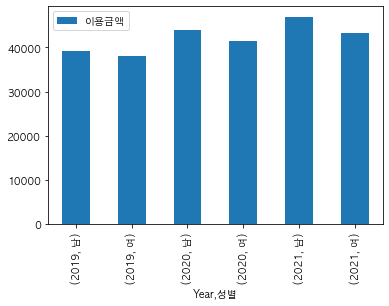

In [10]:
d1.plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

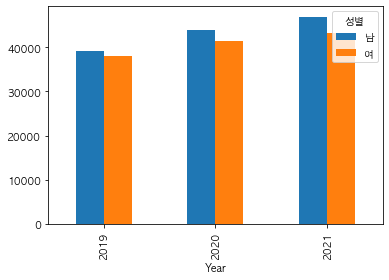

In [11]:
# pivot_table 이용
df_pivot = d1.pivot_table(
    index = 'Year',
    values = '이용금액',
    aggfunc = 'mean',
    columns='성별'

)
df_pivot.plot(kind='bar')

In [12]:
import seaborn as sns

In [13]:
d2 = d1.reset_index().copy()

<AxesSubplot:xlabel='Year', ylabel='이용금액'>

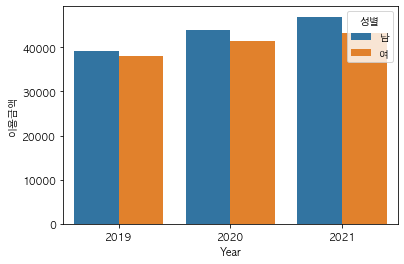

In [14]:
# seaborn 이용
sns.barplot( data = d2, x = 'Year', y = '이용금액', hue='성별')

<AxesSubplot:xlabel='Year'>

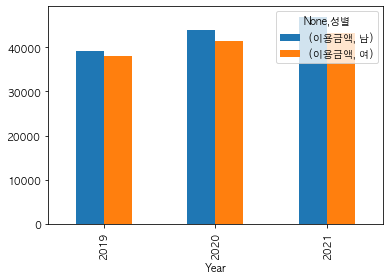

In [15]:
# index를 column으로 이동 : unstack()
d1.unstack().plot(kind='bar')

In [16]:
# column을 index로 이동 : stack()
d1.stack()

Year  성별      
2019  남   이용금액    39184.35
      여   이용금액    38107.84
2020  남   이용금액    44009.59
      여   이용금액    41389.76
2021  남   이용금액    46948.32
      여   이용금액    43306.32
dtype: float64

In [17]:
## 컬럼의 데이터를 인덱스로 변경
## 설정하다(set) + 인덱스(index) -> set_index()
df.set_index('기준년월',inplace = True)

In [18]:
## 기준년별 총 이용금액의 합계를 그래프로 시각화 
df.groupby('기준년월').sum()['총이용금액']

기준년월
2019-01-01    8.717640e+11
2019-02-01    7.755979e+11
2019-03-01    9.027603e+11
2019-04-01    8.850403e+11
2019-05-01    9.427953e+11
2019-06-01    8.651183e+11
2019-07-01    8.757622e+11
2019-08-01    8.504003e+11
2019-09-01    9.243550e+11
2019-10-01    9.305846e+11
2019-11-01    9.497879e+11
2019-12-01    9.788397e+11
2020-01-01    8.988784e+11
2020-02-01    7.081442e+11
2020-03-01    7.232449e+11
2020-04-01    7.884697e+11
2020-05-01    8.671502e+11
2020-06-01    8.476832e+11
2020-07-01    7.958824e+11
2020-08-01    8.421567e+11
2020-09-01    8.638192e+11
2020-10-01    9.075381e+11
2020-11-01    9.155520e+11
2020-12-01    8.032242e+11
2021-01-01    8.091200e+11
2021-02-01    7.698808e+11
2021-03-01    8.747389e+11
2021-04-01    8.403269e+11
2021-05-01    9.169530e+11
2021-06-01    8.168673e+11
2021-07-01    7.840346e+11
2021-08-01    8.560545e+11
2021-09-01    8.163331e+11
Name: 총이용금액, dtype: float64

In [24]:
#그룹화
group_data2 = df[['업종','총이용금액']].groupby(['기준년월','업종']).sum()

In [25]:
group_data2

총이용금액
기준년월       업종                
2019-01-01 백화점   4.558955e+11
           슈퍼마켓  1.736131e+11
           편의점   4.408358e+10
           할인점   1.981718e+11
2019-02-01 백화점   4.011916e+11
...                       ...
2021-08-01 할인점   1.884296e+11
2021-09-01 백화점   4.220812e+11
           슈퍼마켓  1.818095e+11
           편의점   6.136282e+10
           할인점   1.510796e+11

[132 rows x 1 columns]

<AxesSubplot:xlabel='기준년월'>

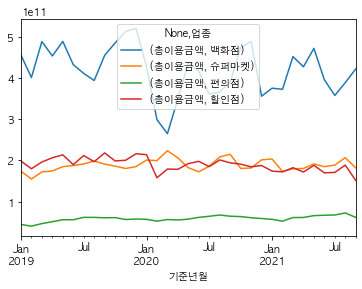

In [27]:
group_data2.unstack().plot()


In [21]:
pivot_data2 = df.pivot_table(
    index = '기준년월',
    columns = '업종',
    values = '총이용금액',
    aggfunc='sum'
)

<AxesSubplot:xlabel='기준년월'>

<Figure size 1440x720 with 0 Axes>

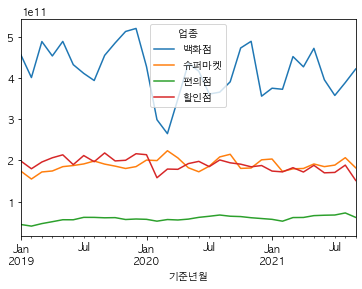

In [22]:
plt.figure(figsize = (20,10))
pivot_data2.plot()